In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
import pickle

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.**

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. **PassengerId:** Id's of passengers


2. **Survived** - Survival (0 = No; 1 = Yes)


3. **Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)


4. **Name** - Name of the passenger


5. **Sex** - Sex of the passenger (Male or female)


6. **Age** - Age of the passenger


7. **SibSp** - Number of Siblings/Spouses Aboard


8. **Parch** - Number of Parents/Children Aboard


9. **Ticket** - Ticket Number


10. **Fare** - Passenger Fare


11. **Cabin** - Cabin number of the passengers


12. **Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Checking the missing values in the dataset

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* **Cabin** has 687 null values.Out of 891 rows, 687 has missing values. It will be good to drop the **Cabin** column as cabin number would not help in predicting the arbitrary passenger on Titanic would survive the sinking or not.


* **Age** has 177 missing values. It will be good to fill the missing values with most frequent (Mode) ages in the column.


* **Embarked** has 2 missing values and need to filled with mode.

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**No missing values now in the dataset.Looks good to proceed**

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data Analysis

* a) **Categorical columns Analysis**

Counter({'male': 577, 'female': 314})

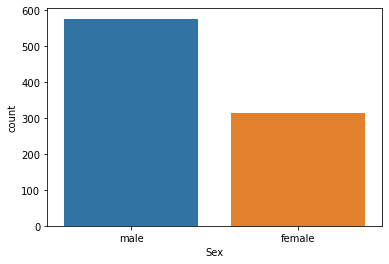

In [14]:
sns.countplot(df['Sex'])
Counter(df['Sex'])

**Number of Male passengers are more than Female passengers**

Counter({0: 549, 1: 342})

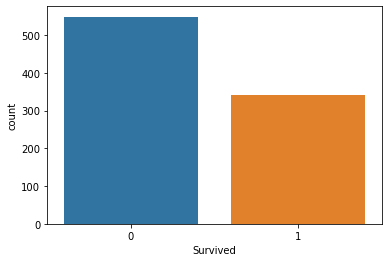

In [15]:
sns.countplot(df['Survived'])
Counter(df['Survived'])

**Out of 891 passengers, only 342 passengers had survived and the remaining 549 passengers were decleared dead.**

<AxesSubplot:xlabel='Sex', ylabel='count'>

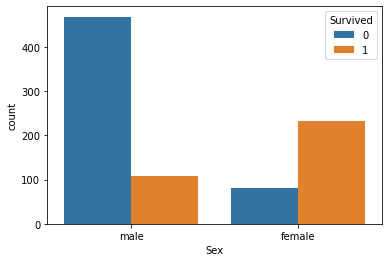

In [16]:
sns.countplot(df['Sex'],hue=df['Survived'])

**We can observe that more number of females survived when compared to male but we have seen previously that more number of males passengers were travelling.It indicates that female passengers were given priority during the rescue operations.**

Counter({3: 491, 1: 216, 2: 184})

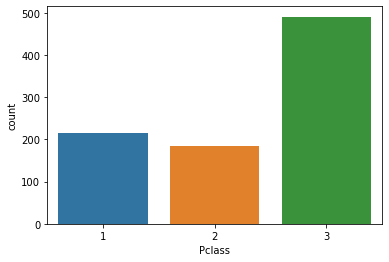

In [17]:
sns.countplot(df['Pclass'])
Counter(df['Pclass'])

**More passengers were travelling in the IIIrd class compartments i.e 491**

Counter({1: 209, 0: 608, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7})

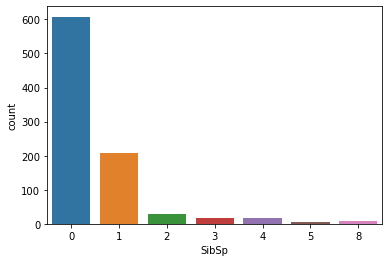

In [18]:
sns.countplot(df['SibSp'])
Counter(df['SibSp'])

**We can observe that out of 891 passengers 608 have no siblings/spouses**

Counter({'S': 646, 'C': 168, 'Q': 77})

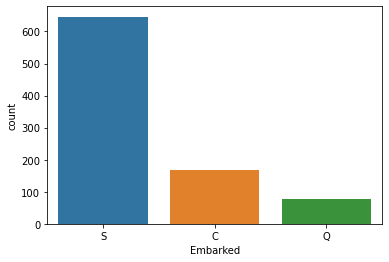

In [19]:
sns.countplot(df['Embarked'])
Counter(df['Embarked'])

**We observe that Port S = Southampton is the major embarkment port for the passengers**

Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

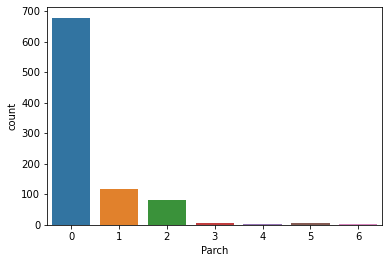

In [20]:
sns.countplot(df['Parch'])
Counter(df['Parch'])

**Out of 891 passengers, 678 passengers have no parents abroad**

* b) **Continuous data aanalysis**

<AxesSubplot:xlabel='Age', ylabel='Density'>

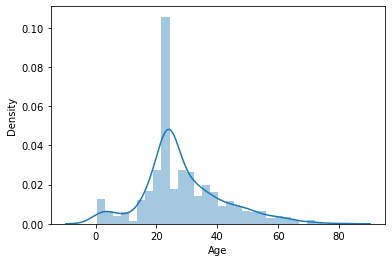

In [21]:
sns.distplot(df['Age'])

**Age data looks normally distributed**

<AxesSubplot:xlabel='Fare', ylabel='Density'>

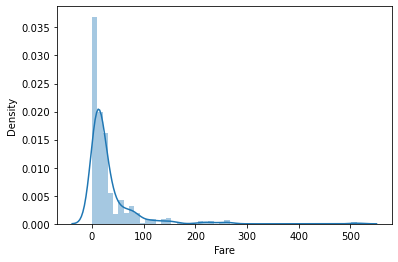

In [12]:
sns.distplot(df['Fare'])

**We observe that the 'Fare' data is positively skewed. Need to reduce skewness to make data normally distributed**

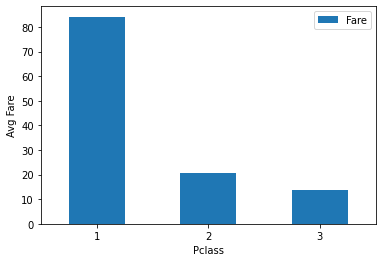

In [13]:
class_fare = df.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()

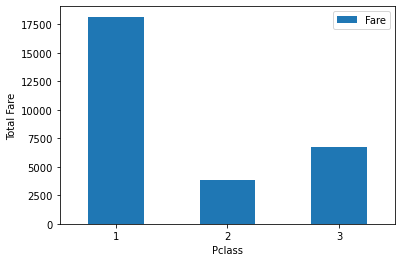

In [14]:
class_fare = df.pivot_table(index='Pclass', values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

**Total fare for first class tickets are much higher than the 2nd and 3rd class tickets fare and hence the data distribution of 'Fare' is much higher for first class and positively skewed**

# Log transformation for uniform data distribution of 'Fare'

In [15]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

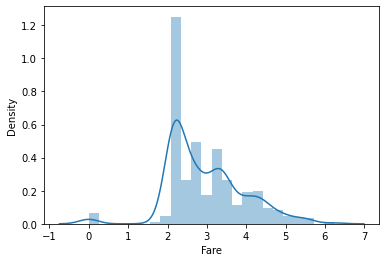

In [16]:
sns.distplot(df['Fare'])

**So Data is uniformly distributed now**

# Correlation Matrix

<AxesSubplot:>

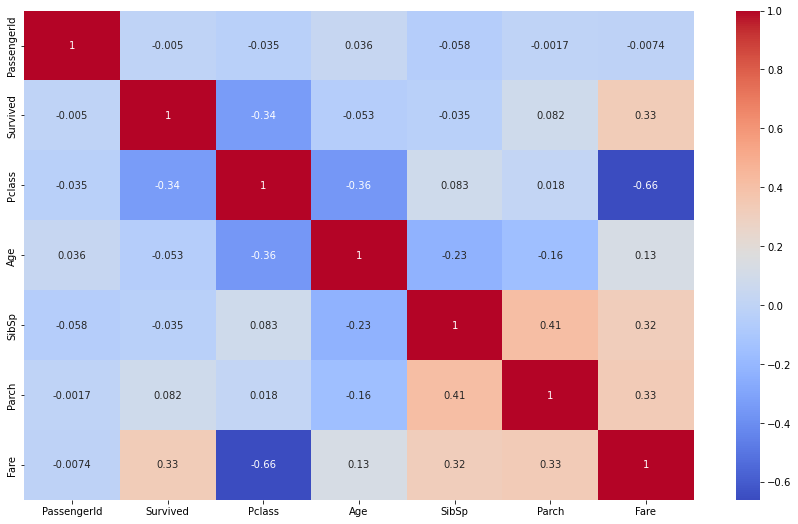

In [28]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')


**Looks good to go ahead**

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


* **"PassengerId"** column is not an important attribute to predict our target hence we will drop this column


* **"Name" and "Ticket"** columns also needs to be dropped as they are just an identity and will not serve the purpose for our prediction


* **"Sex" and "Embarked"** - Encoding required for converting categories into number

In [17]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

# Encoding of Categorical columns using Ordinal Encoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oen = OrdinalEncoder()

In [20]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = oen.fit_transform(df[i].values.reshape(-1,1))

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,2.110213,2.0
1,1,1,0.0,38.0,1,0,4.280593,0.0
2,1,3,0.0,26.0,0,0,2.188856,2.0
3,1,1,0.0,35.0,1,0,3.990834,2.0
4,0,3,1.0,35.0,0,0,2.202765,2.0


# Separating features and target variable

In [22]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [36]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,2.110213,2.0
1,1,0.0,38.0,1,0,4.280593,0.0
2,3,0.0,26.0,0,0,2.188856,2.0
3,1,0.0,35.0,1,0,3.990834,2.0
4,3,1.0,35.0,0,0,2.202765,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,2.639057,2.0
887,1,0.0,19.0,0,0,3.433987,2.0
888,3,0.0,24.0,1,2,3.196630,2.0
889,1,1.0,26.0,0,0,3.433987,0.0


# Best Random State

In [23]:
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    #lr = LogisticRegression()
    #dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    #knn = KNeighborsClassifier()
    #svc = SVC()
    #lr.fit(X_train,y_train)   # Training the model
    #dt.fit(X_train,y_train)
    rf.fit(X_train,y_train)
    #knn.fit(X_train,y_train)
    #svc.fit(X_train,y_train)
    #pred_lr = lr.predict(X_test)  # Predicting the target variable
    #pred_dt = dt.predict(X_test)
    pred_rf = rf.predict(X_test)
    #pred_knn = knn.predict(X_test)
    #pred_svc = svc.predict(X_test)
    #acc_lr = accuracy_score(y_test,pred_lr)
    #acc_dt = accuracy_score(y_test,pred_dt)
    acc_rf = accuracy_score(y_test,pred_rf)
    #acc_knn = accuracy_score(y_test,pred_knn)
    #acc_svc = accuracy_score(y_test,pred_svc)
    #print("Testing Accuracy: ",acc_lr,"at random state", i)
    #print("Testing Accuracy: ",acc_dt,"at random state", i)
    print("Testing Accuracy: ",acc_rf,"at random state", i)
    #print("Testing Accuracy: ",acc_knn,"at random state", i)
    #print("Testing Accuracy: ",acc_svc,"at random state", i)
    
    #if acc_lr>maxAccu:
    #if acc_dt>maxAccu:
    if acc_rf>maxAccu:
    #if acc_knn>maxAccu:
    #if acc_svc>maxAccu:
        #maxAccu = acc_lr
        #maxAccu = acc_dt
        maxAccu = acc_rf
        #maxAccu = acc_knn
        #maxAccu = acc_svc
        
        maxRS = i
        
        print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)
        #print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Testing Accuracy:  0.776536312849162 at random state 1
Maximum Accuracy: 0.776536312849162 at random state  1
Testing Accuracy:  0.8044692737430168 at random state 2
Maximum Accuracy: 0.8044692737430168 at random state  2
Testing Accuracy:  0.7932960893854749 at random state 3
Testing Accuracy:  0.8268156424581006 at random state 4
Maximum Accuracy: 0.8268156424581006 at random state  4
Testing Accuracy:  0.8156424581005587 at random state 5
Testing Accuracy:  0.8156424581005587 at random state 6
Testing Accuracy:  0.7653631284916201 at random state 7
Testing Accuracy:  0.7877094972067039 at random state 8
Testing Accuracy:  0.776536312849162 at random state 9
Testing Accuracy:  0.8212290502793296 at random state 10
Testing Accuracy:  0.8435754189944135 at random state 11
Maximum Accuracy: 0.8435754189944135 at random state  11
Testing Accuracy:  0.7597765363128491 at random state 12
Testing Accuracy:  0.8212290502793296 at random state 13
Testing Accuracy:  0.7932960893854749 at rando

In [24]:
#print("Best accuracy is ",maxAccu*100, "on random state", maxRS)
print("Best accuracy is ",maxAccu*100, "on random state", maxRS)

Best accuracy is  88.26815642458101 on random state 18


LR: We have found the best **random state = 11** and **max accuracy = 85.47%** ,we will create our train test split for this random state.

DT: We have found the best **random state = 46** and **max accuracy = 83.798%** we will create our train test split for this random state.

RF: We have found the best **random state = 18** and **max accuracy = 88.26%**, we will create our train test split for this random state.

KNN: We have found the best **random state = 91** and **max accuracy = 84.92%**, we will create our train test split for this random state.

SVC: We have found the best **random state = 34** and **max accuracy = 77.65%**, we will create our train test split for this random state.

# Function for calculating model performance

In [25]:
# Defining function for calculating the performance of the classification model
def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        print("-----------------Test Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

# Creating Train_test_split

In [46]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=92)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [47]:
X_train.shape

(712, 7)

# Logistic Regression

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)  # train test split at best random state

lr = LogisticRegression()

lr.fit(X_train,y_train)     # Model training

metric_score(lr,X_train,X_test,y_train,y_test,train=True)     # performance calculation on training data

metric_score(lr,X_train,X_test,y_train,y_test,train=False)    # performance calculation on test data

-----------------Train Result--------------------
Accuracy Score : 78.09%
-----------------Test Result--------------------
Accuracy Score : 85.47%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.89      0.89      0.89       118
           1       0.79      0.79      0.79        61

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



# Decision Tree Classifier

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=46)    # train test split at best random state

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

metric_score(dt,X_train,X_test,y_train,y_test,train=True)          # performance calculation on training data

metric_score(dt,X_train,X_test,y_train,y_test,train=False)         # performance calculation on test data

-----------------Train Result--------------------
Accuracy Score : 98.31%
-----------------Test Result--------------------
Accuracy Score : 82.68%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.82      0.90      0.86       104
           1       0.84      0.72      0.78        75

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



# Random Forest Classifier

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

metric_score(rf,X_train,X_test,y_train,y_test,train=True)

metric_score(rf,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 98.31%
-----------------Test Result--------------------
Accuracy Score : 87.15%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.88      0.92      0.90       109
           1       0.86      0.80      0.83        70

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



# K Neighbor Classifier

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=91)

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 83.57%
-----------------Test Result--------------------
Accuracy Score : 84.92%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.90      0.87      0.89       120
           1       0.75      0.81      0.78        59

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179



# SVC

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

svc = SVC()

svc.fit(X_train,y_train)

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 67.98%
-----------------Test Result--------------------
Accuracy Score : 77.65%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.76      0.97      0.85       118
           1       0.89      0.39      0.55        61

    accuracy                           0.78       179
   macro avg       0.82      0.68      0.70       179
weighted avg       0.80      0.78      0.75       179



# Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

# Validation accuracy

cr_lr = cross_val_score(lr,X,y,cv=4)

print("Cross validation score of Logistic Regression model :",cr_lr.mean()*100)

cr_dt = cross_val_score(dt,X,y,cv=6)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

cr_rf = cross_val_score(rf,X,y,cv=7)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

cr_knn = cross_val_score(knn,X,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

cr_svc = cross_val_score(svc,X,y,cv=8)

print("Cross validation score of Support Vector Classifier (SVC) model :",cr_svc.mean()*100)

Cross validation score of Logistic Regression model : 79.35149274835373
Cross validation score of Decision Tree Classifier model : 79.3465445311083
Cross validation score of Random Forest Classifier model : 80.92836051743532
Cross validation score of K Neighbors Classifier model : 77.3316176009039
Cross validation score of Support Vector Classifier (SVC) model : 70.70865508365509


# Hyperparameter Tuning

In [32]:
# For Logistic Regression model

lr_params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'tol':[0.0001,0.001,0.01],
             'random_state':range(1,100),
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params,cv = 4, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'random_state': 4, 'solver': 'liblinear', 'tol': 0.01}


In [33]:
# Model training and performance calculation for Logistic Regression 

lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 77.95%
-----------------Test Result--------------------
Accuracy Score : 84.92%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.79      0.75      0.77        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [34]:
# For Decision Tree Classifier model

dt_params = {'criterion': ['gini','entropy'],
             'splitter': ['best','random'],
             'max_depth': range(9,14),
              'min_samples_leaf': range(1,7),
              'min_samples_split': range(2,7),
              'max_leaf_nodes': range(30,40),
             'random_state': range(46,56)
             }

grd_dt = GridSearchCV(estimator = dt, param_grid = dt_params,cv = 7, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=46)

grd_dt.fit(X_train,y_train)

print("Best parameters : ",grd_dt.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 32, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 52, 'splitter': 'best'}


In [35]:
# Model training and performance calculation for Decision Tree classifier

dt = grd_dt.best_estimator_       # Taking the best parameters in the object

dt.fit(X_train,y_train)           # Training the model on the best parameters

metric_score(dt,X_train,X_test,y_train,y_test,train=True)      # Model performance on training data

metric_score(dt,X_train,X_test,y_train,y_test,train=False)     # Model performance on test data

-----------------Train Result--------------------
Accuracy Score : 88.34%
-----------------Test Result--------------------
Accuracy Score : 85.47%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.84      0.93      0.88       104
           1       0.89      0.75      0.81        75

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



In [51]:
# For Random Forest classifier

rf_params = {'n_estimators': [98,99,101,102],
          'criterion':['gini','entropy'],
         'max_depth': [10,12,13,25],
         'min_samples_split' :[2,3,4,5],
         'min_samples_leaf' :[1,2,3,4]}

grd_rf = GridSearchCV(estimator = rf, param_grid = rf_params,cv = 6, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=49)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 101}


In [52]:
# Model training and performance calculation for Random Forest classifier

dt = grd_dt.best_estimator_           # Taking the best parameters in the object

dt.fit(X_train,y_train)               # Training the model on the best parameters

metric_score(dt,X_train,X_test,y_train,y_test,train=True)         # Model performance on training data

metric_score(dt,X_train,X_test,y_train,y_test,train=False)        # Model performance on test data

-----------------Train Result--------------------
Accuracy Score : 87.50%
-----------------Test Result--------------------
Accuracy Score : 87.15%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.96      0.91       114
           1       0.92      0.71      0.80        65

    accuracy                           0.87       179
   macro avg       0.89      0.84      0.85       179
weighted avg       0.88      0.87      0.87       179



In [53]:
# For K Neighbors classifier

knn_params = { 'n_neighbors':[4,5,6,7],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[25,30,35]}

grd_knn = GridSearchCV(knn,param_grid = knn_params,cv = 5, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=91)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'distance'}


In [54]:
# Model training and performance calculation for K Neighbors classifier

knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 98.17%
-----------------Test Result--------------------
Accuracy Score : 84.92%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.90      0.88      0.89       120
           1       0.76      0.80      0.78        59

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.85      0.85       179



In [36]:
# For SVC

svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,cv = 8, n_jobs =-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}


In [37]:
# Model training and performance calculation for SVC classifier

svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

-----------------Train Result--------------------
Accuracy Score : 86.80%
-----------------Test Result--------------------
Accuracy Score : 82.68%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.88      0.85      0.87       118
           1       0.73      0.79      0.76        61

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



# Plotting ROC AUC Curve

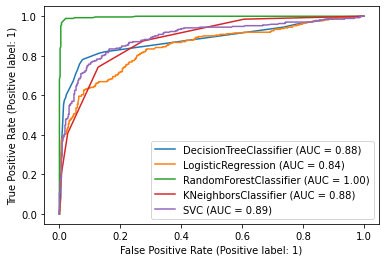

In [45]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(dt,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(rf,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

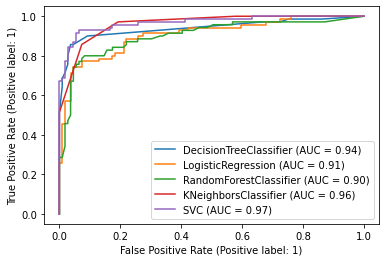

In [46]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**Best model as per ROC AUC Curve:**

* **Random Forest Classifier** 

# Saving the model in pickle format

In [47]:
filename = 'titanic.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [48]:
loaded_model = pickle.load(open('titanic.pkl','rb'))

pred_rf = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_rf)

print(result*100)

87.15083798882681


In [49]:
conclusion = pd.DataFrame([pred_rf,y_test],index=['Predicted','Original'])

In [50]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0,0,1,0,1,1,1,0,0,0,...,0,1,0,1,1,0,1,1,1,0
Original,0,0,1,0,1,0,1,0,1,1,...,0,0,0,1,1,0,1,1,1,0
